In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
import extract_uses.parameters as parameters
import extract_uses.utils as eu_utils

# City to download: Chandigarh
city_ref = "dresden_germany"
cities_folder = 'cities/'
# Population count file
# popu_count_file = "/home/lgervasoni/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-2000/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals_2000.tif"

# Get the required cities shapefile
eu_utils.getCityShapefile(cities_folder, [ city_ref ])

# Set input files
parameters.setInputFiles(cities_folder, city_ref, popu_count_file=None, numberOfCuts = 4)

In [10]:
import extract_uses.main

# Note: If city_country.h5 exists in hdfs store, avoid extracting uses
extract_uses.main.process()

Complete processing: --- 156.347300267 minutes ---
('Merge file', ['cities/dresden_germany/full_activities.shp', 'cities/dresden_germany/full_residential.shp'])
No population count file provided
Population down-scaling
('Merge file', ['cities/dresden_germany/uncertain_inferred_pts_from_poly_.shp', 'cities/dresden_germany/residential_pts_.shp', 'cities/dresden_germany/residential_pts_from_poly_.shp', 'cities/dresden_germany/residential_inferred_pts_from_poly_.shp'])
('Merge folder', 'cities/dresden_germany/')
('Merge file', ['cities/dresden_germany/activities_pts_from_poly_.shp', 'cities/dresden_germany/activities_inferred_pts_from_poly_.shp', 'cities/dresden_germany/activities_pts_.shp'])
('Merge file', ['cities/dresden_germany/activities_inferred_pts_from_poly_q0.shp', 'cities/dresden_germany/activities_inferred_pts_from_poly_q1.shp', 'cities/dresden_germany/activities_inferred_pts_from_poly_q2.shp', 'cities/dresden_germany/activities_inferred_pts_from_poly_q3.shp'])
('Merge file', ['

In [4]:
import loaders

city_ref = "dresden_germany"
# uses_shp = cities_folder+city_ref+"/full_uses.shp"

# City to download: Chandigarh
# bbox = eu_utils.getBoundingBox(uses_shp) # [50.9780205, 13.58603785762049, 51.17996813384094, 13.971962600000001]

pois = loaders.load_pois(city_ref) # no need for shp, it is on hdfs
# kde = loaders.load_grid_kde(city_ref, pois, bbox)

Querying locally for `['pois']`
Found ['pois'] stored locally


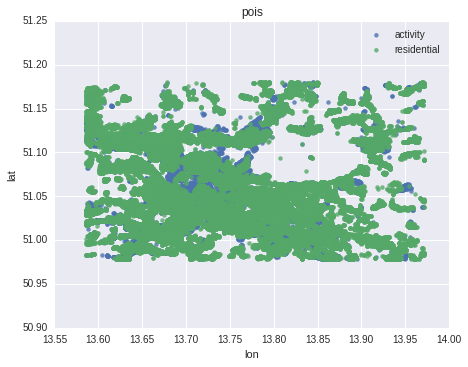

In [5]:
import plots

plots.pois_scatter(pois, overlap=True)

In [20]:
import spatial_measures
import utils

xx, yy = utils.grid_from_bbox(bbox, .0025)

f = spatial_measures.grid_cell_pois_count(pois, xx, yy)

In [21]:
f_act_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='activity'], xx, yy)
f_res_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='residential'], xx, yy)
f_act_kde = spatial_measures.grid_cell_kde_average(kde['activity'].values)
f_res_kde = spatial_measures.grid_cell_kde_average(kde['residential'].values)

In [22]:
moran_act_count = spatial_measures.moran_index(f_act_count, xx, yy)
moran_res_count = spatial_measures.moran_index(f_res_count, xx, yy)
geary_act_count = spatial_measures.geary_index(f_act_count, xx, yy)
geary_res_count = spatial_measures.geary_index(f_res_count, xx, yy)

moran_act_kde = spatial_measures.moran_index(f_act_kde, xx, yy)
moran_res_kde = spatial_measures.moran_index(f_res_kde, xx, yy)
geary_act_kde = spatial_measures.geary_index(f_act_kde, xx, yy)
geary_res_kde = spatial_measures.geary_index(f_res_kde, xx, yy)

entropy_act_kde = spatial_measures.relative_entropy(f_act_kde)
entropy_res_kde = spatial_measures.relative_entropy(f_res_kde)

In [23]:
print("Moran")
print("\tActivities: count %f, kde %f" % (moran_act_count, moran_act_kde))
print("\tResidential: count %f, kde %f" % (moran_res_count, moran_res_kde))

print("Geary")
print("\tActivities: count %f, kde %f" % (geary_act_count, geary_act_kde))
print("\tResidential: count %f, kde %f" % (geary_res_count, geary_res_kde))

print("Entropy")
print("\tActivities: kde %f" % entropy_act_kde)
print("\tResidential: kde %f" % entropy_res_kde)

Moran
	Activities: count 0.064949, kde 0.123618
	Residential: count 0.039979, kde 0.163214
Geary
	Activities: count 1.003444, kde 0.856932
	Residential: count 0.979998, kde 0.848043
Entropy
	Activities: kde 0.940935
	Residential: kde 0.969661
